In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("netflix_titles.csv")

# 📌 Sirf movies select karo aur duration_mins calculate karo
movies = df[df['type'] == 'Movie'].copy()
movies['duration_mins'] = movies['duration'].str.extract(r'(\d+)').astype(float)

In [5]:
# 📌 1. Check correlation between numerical columns
# Corr: +1 = strong positive, -1 = strong negative, 0 = no relation
correlation = movies[['duration_mins', 'release_year']].corr()
print(correlation)

               duration_mins  release_year
duration_mins       1.000000     -0.206285
release_year       -0.206285      1.000000


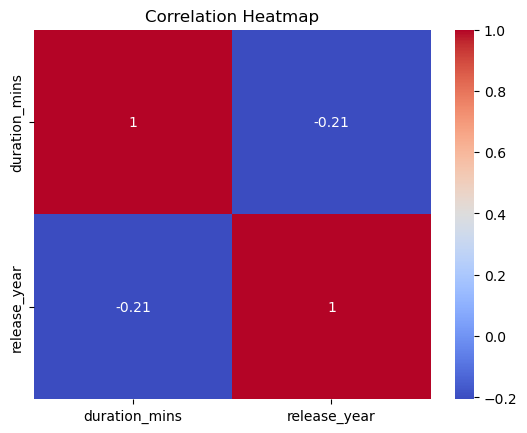

In [7]:

# 📌 2. Heatmap of correlation
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

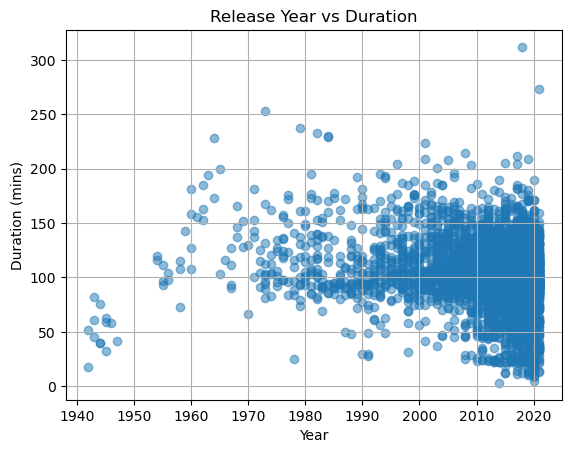

In [9]:
# 📌 3. Scatter Plot – release year vs duration
plt.scatter(movies['release_year'], movies['duration_mins'], alpha=0.5)
plt.title("Release Year vs Duration")
plt.xlabel("Year")
plt.ylabel("Duration (mins)")
plt.grid(True)
plt.show()

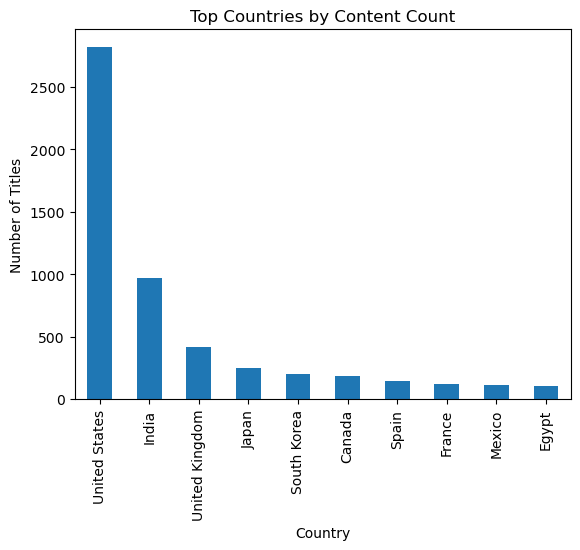

In [11]:
# 📌 4. Group by country to find content count (relation with rating or duration)
country_data = df.groupby('country')['type'].count().sort_values(ascending=False).head(10)
country_data.plot(kind='bar')
plt.title("Top Countries by Content Count")
plt.ylabel("Number of Titles")
plt.xlabel("Country")
plt.show()